# Preprocessing stage

## Reading Binary dataset and convert it to CSV files

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read and convert ubyte data to csv files
def Read_Convert(imagefile,labelfile,outputfile,sample_size):
    """ 
        image file : ubyte image data
        label file : ubyte label data
        outputfile : name of output csv
        sample_size: number of samples in ubyte data
    """
    # open input image & label as binary format
    image_in = open(imagefile,mode='rb')
    label_in = open(labelfile,mode='rb')
    
    # open output file
    file_out = open(outputfile,mode='w')
    
    # read file headers
    image_in.read(16)
    label_in.read(8)
    
    images = [] 
    
    for i in range(sample_size):
        # add one label
        image = [ord(label_in.read(1))]
        
        for j in range(28*28):
            # assign an image to each label
            image.append(ord(image_in.read(1)))
        
        # append the image and its label to images
        images.append(image)
    
    # write images data to file
    for image in images:
        file_out.write(','.join(str(pix) for pix in image) + '\n')
        
    # close files
    image_in.close()
    label_in.close()
    file_out.close()

In [3]:
# Run Data Conversion
print('Start!')

Read_Convert(imagefile='Dataset/train-images.idx3-ubyte',labelfile='Dataset/train-labels.idx1-ubyte'
             ,outputfile='Dataset/minist_train.csv',sample_size=60000)

Read_Convert(imagefile='Dataset/t10k-images.idx3-ubyte' ,labelfile='Dataset/t10k-labels.idx1-ubyte' 
             ,outputfile='Dataset/minist_test.csv' ,sample_size=10000)

print('Finish!')

Start!
Finish!


In [6]:
def Add_label(input_file, Output_file):
    
    col_names = ['label']
    
    # coln_names = ['label', '1', '2', ..., '783','784']
    for i in range(1,785):
        col_names.append(str(i))
        
    # read csv file to check and set the correct name for label column
    df = pd.read_csv(input_file, header=None)
    
    df.columns = col_names
    
    # write new df to csv
    df.to_csv(Output_file, index=False)

In [7]:
# run add_label function for each .csv file

Add_label(input_file='Dataset/minist_train.csv', Output_file='Dataset/minist_train_final.csv')
Add_label(input_file='Dataset/minist_test.csv', Output_file='Dataset/minist_test_final.csv')

In [2]:
# data visalization library
import matplotlib.pyplot as plt
from random import randint

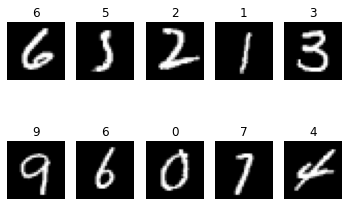

In [9]:
# read files
df_train = pd.read_csv('Dataset/minist_train_final.csv')

# extract labels 
labels_train = df_train['label'].values

# extract digits
df_digits = df_train.drop('label',axis=1)
digits_data_train = df_digits.values

# save figures 
fig, axs = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        index = randint(0,6000)
        digit = digits_data_train[index]
        # reshape as a 28*28 matrix
        digit = digit.reshape(28,28)
    
        axs[i,j].imshow(digit,cmap='gray')
        axs[i,j].set_title(str(labels_train[index]))
        axs[i,j].axis('off')
        
plt.savefig('Fig2.jpg',dpi=300)

# Dimension Reduction

In [3]:
from sklearn import decomposition

In [11]:
def reduce_dimension(data_in,data_out,num_of_features):
    # read data
    df = pd.read_csv(data_in)
    
    # extract labels 
    labels = df['label']
    
    # extract digits
    df.drop('label',axis=1,inplace=True)
    
    # apply PCA
    pca = decomposition.PCA()
    pca.n_components = num_of_features
    pca_data = pca.fit_transform(df)
    pca_data = pd.DataFrame(pca_data)
    
    # add labels to reduced training dataset
    out_df = pd.concat([labels,pca_data],axis=1)
    
    # write new dataset to file
    out_df.to_csv(data_out,index=False)

In [13]:
# run dimension reduction
print('start!')
reduce_dimension(data_in='Dataset/minist_test_final.csv',data_out='Dataset/minist_test_100.csv',num_of_features=100)

reduce_dimension(data_in='Dataset/minist_train_final.csv',data_out='Dataset/minist_train_100.csv',num_of_features=100)

reduce_dimension(data_in='Dataset/minist_train_final.csv',data_out='Dataset/minist_train_40.csv',num_of_features=40)

reduce_dimension(data_in='Dataset/minist_test_final.csv',data_out='Dataset/minist_test_40.csv',num_of_features=40)
print('Finish!')

start!
Finish!


# Training SVM with linear kernel

In [23]:
# using one vs all
from sklearn.multiclass import OneVsRestClassifier
# linear SVM
from sklearn.svm import LinearSVC
# save trained model to file
import pickle
# calculate the time of training process
import timeit

In [16]:
def Linear_SVM(data_in,data_out):
    # start time
    start = timeit.default_timer()
    # read data
    df_train = pd.read_csv(data_in)   
    # shuffle the DataFrame rows
    df_train = df_train.sample(frac = 1)    
    # split label and data
    df_label = df_train['label']
    df_train.drop('label',axis=1,inplace=True)
    
    #create the SVM
    svm = LinearSVC()
    
    # make it an OvR classifier
    ovr_classifier = OneVsRestClassifier(svm)
    
    # fit the data
    ovr_classifier = ovr_classifier.fit(df_train,df_label)
    
    # save trained model to file
    pickle.dump(ovr_classifier, open(data_out, 'wb'))
    
    # stop time
    stop = timeit.default_timer()
    
    print('Training Time: ', stop - start) 

In [17]:
# train Linear SVM for all datasets
Linear_SVM(data_in='Dataset/minist_train_final.csv',data_out='all_features_linear_svm.sav')
Linear_SVM(data_in='Dataset/minist_train_100.csv',data_out='100_features_linear_svm.sav')
Linear_SVM(data_in='Dataset/minist_train_40.csv',data_out='40_features_linear_svm.sav')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Training Time:  143.572271125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Training Time:  257.69158434


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Training Time:  156.98780086600004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Training SVM with RBF kernel

In [22]:
from sklearn.svm import SVC

In [25]:
def RBF_SVM(data_in,data_out):
    # start time
    start = timeit.default_timer()
    # read data
    df_train = pd.read_csv(data_in)
    # shuffle the DataFrame rows
    df_train = df_train.sample(frac = 1)
    # split label and data
    df_label = df_train['label']
    df_train.drop('label',axis=1,inplace=True)
    
    #create the SVM
    svm = SVC(kernel='rbf')
    
    # make it an OvR classifier
    ovr_classifier = OneVsRestClassifier(svm)
    
    # fit the data
    ovr_classifier = ovr_classifier.fit(df_train,df_label)
    
    # save trained model to file
    pickle.dump(ovr_classifier, open(data_out, 'wb'))
    
    # stop time
    stop = timeit.default_timer()
    
    print('Training Time: ', stop - start)

In [24]:
# train RBF SVM for all datasets
RBF_SVM(data_in='Dataset/minist_train_final.csv',data_out='all_features_rbf_svm.sav')
RBF_SVM(data_in='Dataset/minist_train_100.csv',data_out='100_features_rbf_svm.sav')
RBF_SVM(data_in='Dataset/minist_train_40.csv',data_out='40_features_rbf_svm.sav')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Training Time:  1099.445869252


# Training Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
def Decision_Tree(data_in,data_out):
    # start time
    start = timeit.default_timer()
    # read data
    df_train = pd.read_csv(data_in)
    # shuffle the DataFrame rows
    df_train = df_train.sample(frac = 1)
    # split label and data
    df_label = df_train['label']
    df_train.drop('label',axis=1,inplace=True)
    
    #create the DTree
    DTree = DecisionTreeClassifier()
    
    # make it an OvR classifier
    ovr_classifier = OneVsRestClassifier(DTree)
    
    # fit the data
    ovr_classifier = ovr_classifier.fit(df_train,df_label)
    
    # save trained model to file
    pickle.dump(ovr_classifier, open(data_out, 'wb'))
    
    # stop time
    stop = timeit.default_timer()
    
    print('Training Time: ', stop - start)

In [22]:
# train Decision Tree for all datasets
Decision_Tree(data_in='Dataset/minist_train_final.csv',data_out='all_features_DTree.sav')
Decision_Tree(data_in='Dataset/minist_train_100.csv'  ,data_out='100_features_DTree.sav')
Decision_Tree(data_in='Dataset/minist_train_40.csv'   ,data_out='40_features_DTree.sav')

Training Time:  149.29010602799997
Training Time:  163.463708494
Training Time:  51.20487253099998


# Evaluating Trained Models

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score,roc_curve,auc,roc_auc_score
import seaborn as sns

In [12]:
def evaluate(model_name,test_file,output_name):
    
    # open trained model file
    trained_file = open(model_name,'rb')
    # Load trained file
    trained_model = pickle.load(trained_file)
    
    #Load test dataset
    Test = pd.read_csv(test_file)
    # split X and Y
    Y_test = Test['label']
    X_test = Test.drop('label',axis=1)
    
    # Confusion Matrix
    predicted = trained_model.predict(X_test)
    ConfMatrix = confusion_matrix(Y_test,predicted)
    # save matrix to file
    Tmp_name = output_name + '_confusion_matrix.csv'
    pd.DataFrame(ConfMatrix).to_csv(Tmp_name)
    # plot data
    plt.figure(figsize = (10,7))  
    Tmp_name = output_name + '_confusion.jpg'
    sns.heatmap(ConfMatrix,annot=True,cbar=False,fmt='g',linewidths=0.5,cmap='PuBu').figure.savefig(Tmp_name,dpi=400)
    
    # Precision
    Precision = precision_score(Y_test,predicted,average="macro")
    print('Precision: ',Precision)
    # Recall
    Recall = recall_score(Y_test,predicted,average="macro")
    print('Recall: ',Recall) 
    # f1 
    F1 = f1_score(Y_test,predicted,average="macro")
    print('F1: ',F1) 
    # write measures in a text file
    Tmp_name = output_name + '_measure.txt'
    outfile = open(Tmp_name,'w')
    outfile.write('Precision: ')
    outfile.write(str(Precision))
    outfile.write('\n')
    outfile.write('Recall: ')
    outfile.write(str(Recall))
    outfile.write('\n')
    outfile.write('F1: ')
    outfile.write(str(F1))
    outfile.close()
    
    #Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc_s = dict()
    n_classes = 10
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test, predicted,i)
        roc_auc_s[i] = auc(fpr[i], tpr[i])
        
    # plot ROC and AUC
    fig, axs = plt.subplots(2, 5)
    fig.set_figheight(9)
    fig.set_figwidth(16)
    
    for i in range(2):
        for j in range(5):
            axs[i,j].plot(fpr[i*5+j],tpr[i*5+j],label='C {0} (area = %0.2f)'.format(i*5+j) %roc_auc_s[i*5+j])
            axs[i,j].set_title(str('C{0} (area = %0.2f)'.format(i*5+j) %roc_auc_s[i*5+j]))
            axs[i,j].plot([0, 1], [0, 1], 'k--')
            
            if(i != 1):
                axs[i,j].get_xaxis().set_ticks([])
            if(j != 0):
                axs[i,j].get_yaxis().set_ticks([])
                
    Tmp_name = output_name + '_ROC.jpg'
    fig.savefig(Tmp_name,dpi=450)

In [13]:
# run evaluation for all 9 model

# linear SVM
evaluate('Models/all_features_linear_svm.sav','Dataset/minist_test_final.csv','data/minist_linear_svm_all')
evaluate('Models/100_features_linear_svm.sav','Dataset/minist_test_100.csv','data/minist_linear_svm_100')
evaluate('Models/40_features_linear_svm.sav','Dataset/minist_test_40.csv','data/minist_linear_svm_40')

# RBF SVM
evaluate('Models/all_features_rbf_svm.sav','Dataset/minist_test_final.csv','data/minist_rbf_svm_all')
evaluate('Models/100_features_rbf_svm.sav','Dataset/minist_test_100.csv','data/minist_rbf_svm_100')
evaluate('Models/40_features_rbf_svm.sav','Dataset/minist_test_40.csv','data/minist_rbf_svm_40')

# Decision Tree
evaluate('Models/all_features_DTree.sav','Dataset/minist_test_final.csv','data/minist_Dtree_all')
evaluate('Models/100_features_DTree.sav','Dataset/minist_test_100.csv','data/minist_Dtree_100')
evaluate('Models/40_features_DTree.sav','Dataset/minist_test_40.csv','data/minist_Dtree_40')

# Bouns Section: Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [26]:
def CV(model_name,Training_file, Test_file,K):
    # read train and test data
    Train_df = pd.read_csv(Training_file)
    Test_df  = pd.read_csv(Test_file)
    # concate 2 dataframe
    DF = pd.concat([Train_df,Test_df])
    # split X and Y
    Y = DF['label']
    X = DF.drop('label',axis=1)
    
    # open trained model file
    trained_file = open(model_name,'rb')
    # Load trained file
    trained_model = pickle.load(trained_file)
    
    cross_val = ShuffleSplit(n_splits=K, test_size=0.15, random_state=0)
    scores = cross_val_score(trained_model, X, Y, cv=cross_val)
    print(scores)
    fi = open('test.txt','w')
    fi.write(str(scores))
    fi.close()

In [27]:
CV('Models/all_features_linear_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',5)
CV('Models/all_features_linear_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',7)
CV('Models/all_features_linear_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',10)

CV('Models/all_features_rbf_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',5)
CV('Models/all_features_rbf_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',7)
CV('Models/all_features_rbf_svm.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',10)

CV('Models/all_features_DTree.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',5)
CV('Models/all_features_DTree.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',7)
CV('Models/all_features_DTree.sav','Dataset/minist_train_final.csv','Dataset/minist_test_final.csv',10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[0.86361905 0.85752381 0.85933333 0.8552381  0.86114286]
